In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import flopy

config = {'font.family': 'Arial',
          'font.size': 12,
          'xtick.direction': 'in',
          'ytick.direction': 'in',
          'mathtext.fontset': 'stix',
         }
plt.rcParams.update(config)

results = np.load(f"./output/results.npy")
porosity = np.load(f"./output/results_porosity.npy")
K = np.load(f"./output/results_K.npy")
diffcs = np.load(f"./output/results_diffc.npy")

MIN3P_output_minerals = pd.read_csv("./input_data/MIN3P_output_minerals.csv")
MIN3P_output = pd.read_csv("./input_data/MIN3P_output.csv")

Text(0.5, 1.0, 'Porosity')

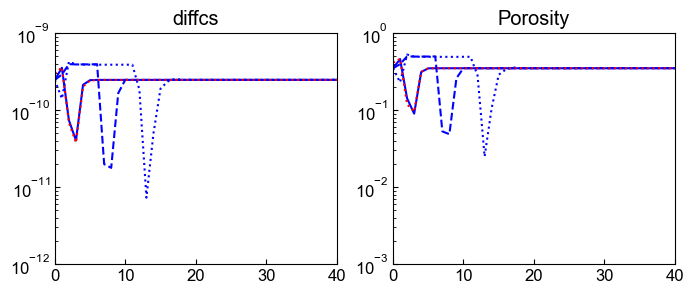

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].plot(MIN3P_output["Diffusion coefficient 100years"], linestyle='-', c="blue")
axes[0].plot(MIN3P_output["Diffusion coefficient 1000years"], linestyle='--', c="blue")
axes[0].plot(MIN3P_output["Diffusion coefficient 3000years"], linestyle=':', c="blue")
# axes[0].plot(diffcs[3000]/86400 * porosity[3000], c="red", linestyle='-')
# axes[0].plot(diffcs[30000]/86400 * porosity[30000], c="red", linestyle='--')
axes[0].plot(diffcs[-1]/86400 * porosity[-1], c="red", linestyle=':')
axes[0].set_yscale('log')
axes[0].set_ylim(1e-12, 1e-9)
axes[0].set_xlim(0, 40)
axes[0].set_title("diffcs")

axes[1].plot(MIN3P_output["Porosity 100years"], linestyle='-', c="blue")
axes[1].plot(MIN3P_output["Porosity 1000years"], linestyle='--', c="blue")
axes[1].plot(MIN3P_output["Porosity 3000years"], linestyle=':', c="blue")
# axes[1].plot(porosity[3000], c="red", linestyle='-')
# axes[1].plot(porosity[30000], c="red", linestyle='--')
axes[1].plot(porosity[28000], c="red", linestyle=':')
axes[1].set_yscale('log')
axes[1].set_ylim(1e-3, 1e-0)
axes[1].set_xlim(0, 40)
axes[1].set_title("Porosity")

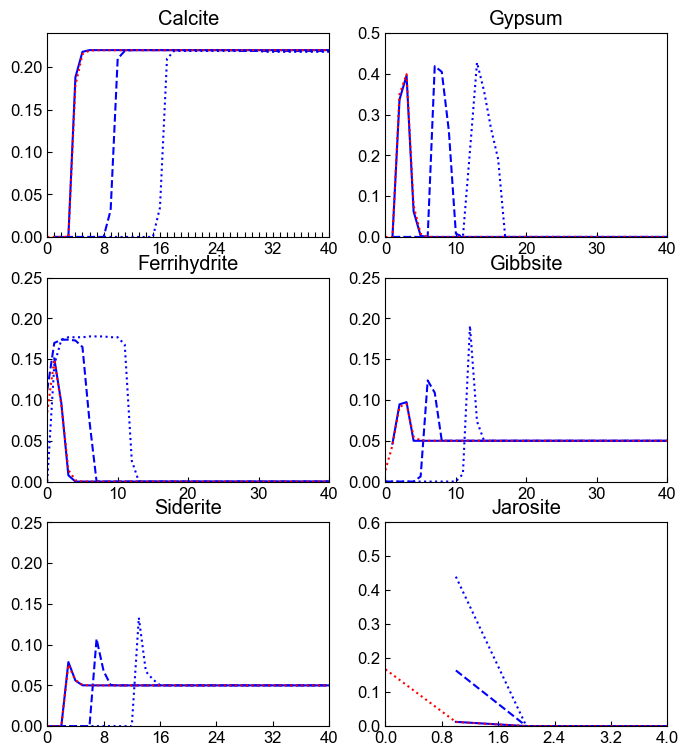

In [3]:
fig, axes = plt.subplots(3, 2, figsize=(8, 9))

axes[0, 0].plot(np.arange(1, 82, 1), MIN3P_output_minerals["Calcite 100years"],  linestyle='-', c="blue")
axes[0, 0].plot(np.arange(1, 82, 1), MIN3P_output_minerals["Calcite 1000years"], linestyle='--', c="blue")
axes[0, 0].plot(np.arange(1, 82, 1), MIN3P_output_minerals["Calcite 3000years"], linestyle=':', c="blue")
# axes[0, 0].plot(results[3000, 0, :] / 2.71 * 100.09 / 1000, c="red", linestyle='-')
# axes[0, 0].plot(results[30000, 0, :] / 2.71 * 100.09 / 1000, c="red", linestyle='--')
axes[0, 0].plot(results[-1, 0, :] / 2.71 * 100.09 / 1000, c="red", linestyle=':')
axes[0, 0].set_title("Calcite")
axes[0, 0].set_xlim(0.00, 40)
axes[0, 0].set_ylim(0.0, 0.24)
ticks = np.linspace(0, 40, 41)
axes[0, 0].set_xticks(ticks)
labels = [str(int(t)) if t % 8 == 0 else "" for t in ticks]
axes[0, 0].set_xticklabels(labels)

axes[0, 1].plot(np.arange(1, 82, 1), MIN3P_output_minerals["Gypsum 100years"],  linestyle='-', c="blue")
axes[0, 1].plot(np.arange(1, 82, 1), MIN3P_output_minerals["Gypsum 1000years"], linestyle='--', c="blue")
axes[0, 1].plot(np.arange(1, 82, 1), MIN3P_output_minerals["Gypsum 3000years"], linestyle=':', c="blue")
# axes[0, 1].plot(results[3000, 2, :] / 2.32 * 172.17 / 1000, c="red", linestyle='-')
# axes[0, 1].plot(results[30000, 2, :] / 2.32 * 172.17 / 1000, c="red", linestyle='--')
axes[0, 1].plot(results[-1, 2, :] / 2.32 * 172.17 / 1000, c="red", linestyle=':')
axes[0, 1].set_title("Gypsum")
axes[0, 1].set_xlim(0.00, 40)
axes[0, 1].set_ylim(0.0, 0.5)
_ = axes[0, 1].set_xticks(np.linspace(0,40,5))

axes[1, 0].plot(np.arange(1, 82, 1), MIN3P_output_minerals["Ferrihydrite 100years"],  linestyle='-', c="blue")
axes[1, 0].plot(MIN3P_output_minerals["Ferrihydrite 1000years"], linestyle='--', c="blue")
axes[1, 0].plot(MIN3P_output_minerals["Ferrihydrite 3000years"], linestyle=':', c="blue")
# axes[1, 0].plot(results[3000, 4, :] / 4.37 * 104.87 / 1000, c="red", linestyle='-')
# axes[1, 0].plot(results[30000, 4, :] / 4.37 * 104.87 / 1000, c="red", linestyle='--')
axes[1, 0].plot(results[-1, 4, :] / 4.37 * 104.87 / 1000, c="red", linestyle=':')
axes[1, 0].set_title("Ferrihydrite")
axes[1, 0].set_xlim(0.00, 40)
axes[1, 0].set_ylim(0.0, 0.25)
_ = axes[1, 0].set_xticks(np.linspace(0,40,5))

axes[1, 1].plot(np.arange(1, 82, 1), MIN3P_output_minerals["Gibbsite 100years"],  linestyle='-', c="blue")
axes[1, 1].plot(MIN3P_output_minerals["Gibbsite 1000years"], linestyle='--', c="blue")
axes[1, 1].plot(MIN3P_output_minerals["Gibbsite 3000years"], linestyle=':', c="blue")
# axes[1, 1].plot(results[3000, 8, :] / 2.35 * 78.00 / 1000, c="red", linestyle='-')
# axes[1, 1].plot(results[30000, 8, :] / 2.35 * 78.00 / 1000, c="red", linestyle='--')
axes[1, 1].plot(results[-1, 8, :] / 2.35 * 78.00 / 1000, c="red", linestyle=':')
axes[1, 1].set_title("Gibbsite")
axes[1, 1].set_xlim(0.00, 40)
axes[1, 1].set_ylim(0.0, 0.25)
_ = axes[1, 1].set_xticks(np.linspace(0,40,5))

axes[2, 0].plot(np.arange(1, 82, 1), MIN3P_output_minerals["Siderite 100years"], linestyle='-', c="blue")
axes[2, 0].plot(MIN3P_output_minerals["Siderite 1000years"], linestyle='--', c="blue")
axes[2, 0].plot(MIN3P_output_minerals["Siderite 3000years"], linestyle=':', c="blue")
# axes[2, 0].plot(results[3000, 10, :] / 3.96 * 115.86 / 1000, c="red", linestyle='-')
# axes[2, 0].plot(results[30000, 10, :] / 3.96 * 115.86 / 1000, c="red", linestyle='--')
axes[2, 0].plot(results[-1, 10, :] / 3.96 * 115.86 / 1000, c="red", linestyle=':')
axes[2, 0].set_title("Siderite")
axes[2, 0].set_xlim(0.00, 40)
axes[2, 0].set_ylim(0.0, 0.25)
_ = axes[2, 0].set_xticks(np.linspace(0,40,6))

axes[2, 1].plot(np.arange(1, 82, 1), MIN3P_output_minerals["Jarosite 100years"], linestyle='-', c="blue")
axes[2, 1].plot(np.arange(1, 82, 1), MIN3P_output_minerals["Jarosite 1000years"], linestyle='--', c="blue")
axes[2, 1].plot(np.arange(1, 82, 1), MIN3P_output_minerals["Jarosite 3000years"], linestyle=':', c="blue")
# axes[2, 1].plot(results[3000, 6, :] / 3.20 * 494.81 / 1000, c="red", linestyle='-')
# axes[2, 1].plot(results[30000, 6, :] / 3.20 * 494.81 / 1000, c="red", linestyle='--')
axes[2, 1].plot(results[-1, 6, :] / 3.20 * 494.81 / 1000, c="red", linestyle=':')
axes[2, 1].set_title("Jarosite")
axes[2, 1].set_xlim(0.00, 4)
axes[2, 1].set_ylim(0.0, 0.6)
_ = axes[2, 1].set_xticks(np.linspace(0,4,6))